### 1. Design a deep learning experiment for a multi class classification dataset https://www.kaggle.com/datasets/abisheksudarshan/customer-segmentation. 
    - It is a multi class classification task where “var_1” is a class label column having 3 categories as Cat_6: 65%, Cat_4: 13%, Other: 22%. 
    - There is a slight imblance in class distribution.
    - This link contains two files ‘train.csv’ and ‘test.csv’. You need to divide the ‘train.csv’ in appropriate percentage to get the validation set. Your experiment should involve following step in appropriate order.

# Importing the necessary Lib

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True, palette="dark" )
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras.callbacks import Callback
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_curve, auc
from imblearn.over_sampling import SMOTE


# Preprocessing the Train data:

#### * Loading the training dataset :

In [4]:
train_data = pd.read_csv('train.csv')
display(train_data)

ID  Gender Ever_Married  Age Graduated     Profession  \
0     462809    Male           No   22        No     Healthcare   
1     462643  Female          Yes   38       Yes       Engineer   
2     466315  Female          Yes   67       Yes       Engineer   
3     461735    Male          Yes   67       Yes         Lawyer   
4     462669  Female          Yes   40       Yes  Entertainment   
...      ...     ...          ...  ...       ...            ...   
8063  464018    Male           No   22        No            NaN   
8064  464685    Male           No   35        No      Executive   
8065  465406  Female           No   33       Yes     Healthcare   
8066  467299  Female           No   27       Yes     Healthcare   
8067  461879    Male          Yes   37       Yes      Executive   

      Work_Experience Spending_Score  Family_Size  Var_1 Segmentation  
0                 1.0            Low          4.0  Cat_4            D  
1                 NaN        Average          3.0  Cat_4            A  
2                 1.0            Low          1.0  Cat_6            B  
3                 0.0           High          2.0  Cat_6            B  
4                 NaN           High          6.0  Cat_6            A  
...               ...            ...          ...    ...          ...  
8063              0.0            Low          7.0  Cat_1            D  
8064              3.0            Low          4.0  Cat_4            D  
8065              1.0            Low          1.0  Cat_6            D  
8066              1.0            Low          4.0  Cat_6            B  
8067              0.0        Average          3.0  Cat_4            B  

[8068 rows x 11 columns]

#### Dropping the "Segmentation" column

In [5]:
train_data.drop(columns=['Segmentation'], inplace=True)
display(train_data)

ID  Gender Ever_Married  Age Graduated     Profession  \
0     462809    Male           No   22        No     Healthcare   
1     462643  Female          Yes   38       Yes       Engineer   
2     466315  Female          Yes   67       Yes       Engineer   
3     461735    Male          Yes   67       Yes         Lawyer   
4     462669  Female          Yes   40       Yes  Entertainment   
...      ...     ...          ...  ...       ...            ...   
8063  464018    Male           No   22        No            NaN   
8064  464685    Male           No   35        No      Executive   
8065  465406  Female           No   33       Yes     Healthcare   
8066  467299  Female           No   27       Yes     Healthcare   
8067  461879    Male          Yes   37       Yes      Executive   

      Work_Experience Spending_Score  Family_Size  Var_1  
0                 1.0            Low          4.0  Cat_4  
1                 NaN        Average          3.0  Cat_4  
2                 1.0            Low          1.0  Cat_6  
3                 0.0           High          2.0  Cat_6  
4                 NaN           High          6.0  Cat_6  
...               ...            ...          ...    ...  
8063              0.0            Low          7.0  Cat_1  
8064              3.0            Low          4.0  Cat_4  
8065              1.0            Low          1.0  Cat_6  
8066              1.0            Low          4.0  Cat_6  
8067              0.0        Average          3.0  Cat_4  

[8068 rows x 10 columns]

## Exploratory Data Analysis (EDA) :

#### * Checking the shape of the data :

In [6]:
print("Shape of the dataset : ", train_data.shape)

Shape of the dataset :  (8068, 10)


train_data has 8068 rows and 10 columns

#### * Checking the Duplicate rows in the dataset :

In [7]:
duplicate_rows = train_data[train_data.duplicated()]

if not duplicate_rows.empty:
    print("Duplicate rows found. Details:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


#### * Information related to dataset :

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 630.4+ KB


#### * Defining the columns as per the Data type :

In [9]:
numeric_columns = list(train_data.select_dtypes(include=['int']).columns)
categorical_columns = list(train_data.select_dtypes(include=['object']).columns)
float_columns = train_data.select_dtypes(include=['float']).columns.tolist()

print("Numeric columns :",numeric_columns)
print("Float columns :",float_columns)
print("Categorical columns :",categorical_columns)

Numeric columns : ['ID', 'Age']
Float columns : ['Work_Experience', 'Family_Size']
Categorical columns : ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']


#### * Statistical information with respect to data types in dataset :

In [10]:
display(train_data[numeric_columns].describe().T)
display(train_data[categorical_columns].describe().T)
display(train_data[float_columns].describe().T)

count           mean          std       min        25%       50%  \
ID   8068.0  463479.214551  2595.381232  458982.0  461240.75  463472.5   
Age  8068.0      43.466906    16.711696      18.0      30.00      40.0   

           75%       max  
ID   465744.25  467974.0  
Age      53.00      89.0

count unique     top  freq
Gender          8068      2    Male  4417
Ever_Married    7928      2     Yes  4643
Graduated       7990      2     Yes  4968
Profession      7944      9  Artist  2516
Spending_Score  8068      3     Low  4878
Var_1           7992      7   Cat_6  5238

count      mean       std  min  25%  50%  75%   max
Work_Experience  7239.0  2.641663  3.406763  0.0  0.0  1.0  4.0  14.0
Family_Size      7733.0  2.850123  1.531413  1.0  2.0  3.0  4.0   9.0

## Cheking and handelling the null values if any in dataset :

In [11]:
null_counts = train_data.isnull().sum()

if null_counts.any():
    print("Null values present. Details:")
    print(null_counts)
    null_rows = train_data[train_data.isnull().any(axis=1)]
    #print("\nRows with null values:")
    #display(null_rows)
    total_nulls = train_data.isnull().sum().sum()
    print("Total Null Values in the data :", total_nulls)
else:
    print("No null values present.")

Null values present. Details:
ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
dtype: int64
Total Null Values in the data : 1582


#### * Frequency of Unique Values in Columns with null values :

In [12]:
total_null_values = 0

for column_list, column_type in [(float_columns, "Float"), (categorical_columns, "Categorical")]:
    for column in column_list:
        unique_values = train_data[column].value_counts()
        null_values = train_data[column].isnull().sum() 
        total_null_values += null_values 
        if null_values > 0:
            print(f"\n{column} ({column_type}):")
            print(f"\tValue".ljust(10), "Count")
            print(''.ljust(5), '-' * 18)
            for value, count in unique_values.items():
                print(f"\t{str(value).ljust(10)} {count}") if column_type == "Float" else print(f"\t{value.ljust(10)} {count}")
            print(f"\t{'Null'.ljust(10)} {null_values}")

print("\nTotal Null Values:", total_null_values)



Work_Experience (Float):
	Value     Count
      ------------------
	1.0        2354
	0.0        2318
	9.0        474
	8.0        463
	2.0        286
	3.0        255
	4.0        253
	6.0        204
	7.0        196
	5.0        194
	10.0       53
	11.0       50
	12.0       48
	13.0       46
	14.0       45
	Null       829

Family_Size (Float):
	Value     Count
      ------------------
	2.0        2390
	3.0        1497
	1.0        1453
	4.0        1379
	5.0        612
	6.0        212
	7.0        96
	8.0        50
	9.0        44
	Null       335

Ever_Married (Categorical):
	Value     Count
      ------------------
	Yes        4643
	No         3285
	Null       140

Graduated (Categorical):
	Value     Count
      ------------------
	Yes        4968
	No         3022
	Null       78

Profession (Categorical):
	Value     Count
      ------------------
	Artist     2516
	Healthcare 1332
	Entertainment 949
	Engineer   699
	Doctor     688
	Lawyer     623
	Executive  599
	Marketing  292
	Homemaker  24

#### For Float_columns :
1. Work_Experience: 
    - The null values in the Work_Experience field will be imputed using the median. The median is chosen because it is resilient to outliers and represents the data's core tendency.
2. Family_Size: 
    - Similar to Work_Experience, null values in the Family_Size field will be imputed using the median. Again, the median is chosen above the mean for dealing with outliers effectively.
    
#### By replacing null values with the median, we ensure that the distribution of work experience and family size remains relatively constant, preserving the dataset's integrity.
    
#### For categorical_columns :
1. Ever_Married: 
    - Replace null values with the column's mode (most frequent value), "Yes". This preserves the distribution of the data.
2. Graduated: 
    - To maintain the distribution, replace null values with the column's mode, "Yes".
3. Profession: 
    - Given the tiny number of null values (124 out of 11184), it may be appropriate to impute them with the "Artist" mode.

#### There are no null values in the Gender, Spending_Score, and Segmentation column, so no action is needed.  
    

#### For "Var_1" column which is target column so i am going to remove all the rows with null values.

## Code for imputing the null values :

#### * Imputing null values in (Ever_Married, Graduated, Profession, column with mode

In [13]:
train_data['Ever_Married'].fillna(train_data['Ever_Married'].mode()[0], inplace=True)

train_data['Graduated'].fillna(train_data['Graduated'].mode()[0], inplace=True)

train_data['Profession'].fillna(train_data['Profession'].mode()[0], inplace=True)


#### * Imputing null values in (Work_Experience, Family_Size) column with median

In [14]:
train_data['Work_Experience'].fillna(train_data['Work_Experience'].median(), inplace=True)

train_data['Family_Size'].fillna(train_data['Family_Size'].median(), inplace=True)

#### * Removing the rows where null values which are present in the target column

In [15]:
train_data.dropna(subset=['Var_1'], inplace=True)

## Checking the null value count after imputing the null values:

In [16]:
print("Total Null Values Remaining after handelling the null values :", train_data.isnull().sum().sum())
print("Shape of the data after Removing rows with null values in the 'Var_1' column :", train_data.shape)

Total Null Values Remaining after handelling the null values : 0
Shape of the data after Removing rows with null values in the 'Var_1' column : (7992, 10)


In [17]:
train_data.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64

### 

# Visualization

#### * Analysing the target variable distrubution :

In [18]:
Var_1_groupby = train_data.groupby('Var_1').size()
print(Var_1_groupby)

Var_1
Cat_1     133
Cat_2     422
Cat_3     822
Cat_4    1089
Cat_5      85
Cat_6    5238
Cat_7     203
dtype: int64


In [19]:
train_data.loc[~train_data['Var_1'].isin(['Cat_6', 'Cat_4']), 'Var_1'] = 'others'

In [20]:
Var_1_groupby = train_data.groupby('Var_1').size()
print(Var_1_groupby)

Var_1
Cat_4     1089
Cat_6     5238
others    1665
dtype: int64


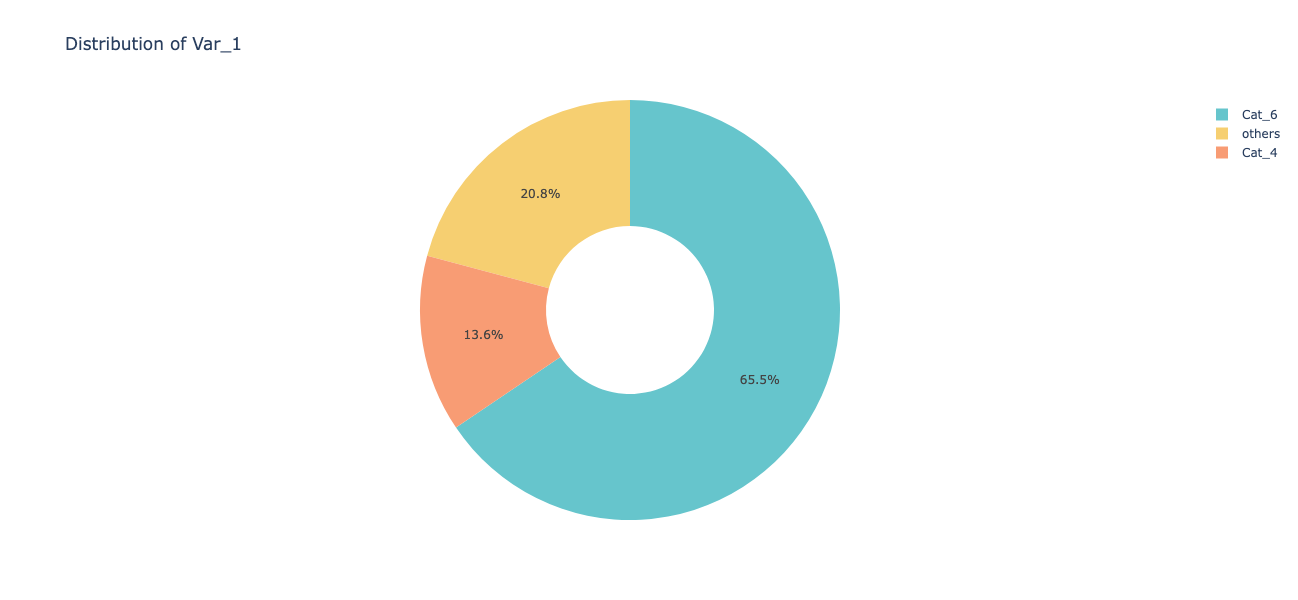

In [21]:
custom_colors = px.colors.qualitative.Pastel

fig_pie = px.pie(Var_1_groupby, values=Var_1_groupby.values, names=Var_1_groupby.index, 
                 title='Distribution of Var_1',  
                 hole=0.4, color_discrete_sequence=custom_colors,
                 width=700, height=600)
fig_pie.show()

#### * Distribution and skewness of numerical, Float columns:

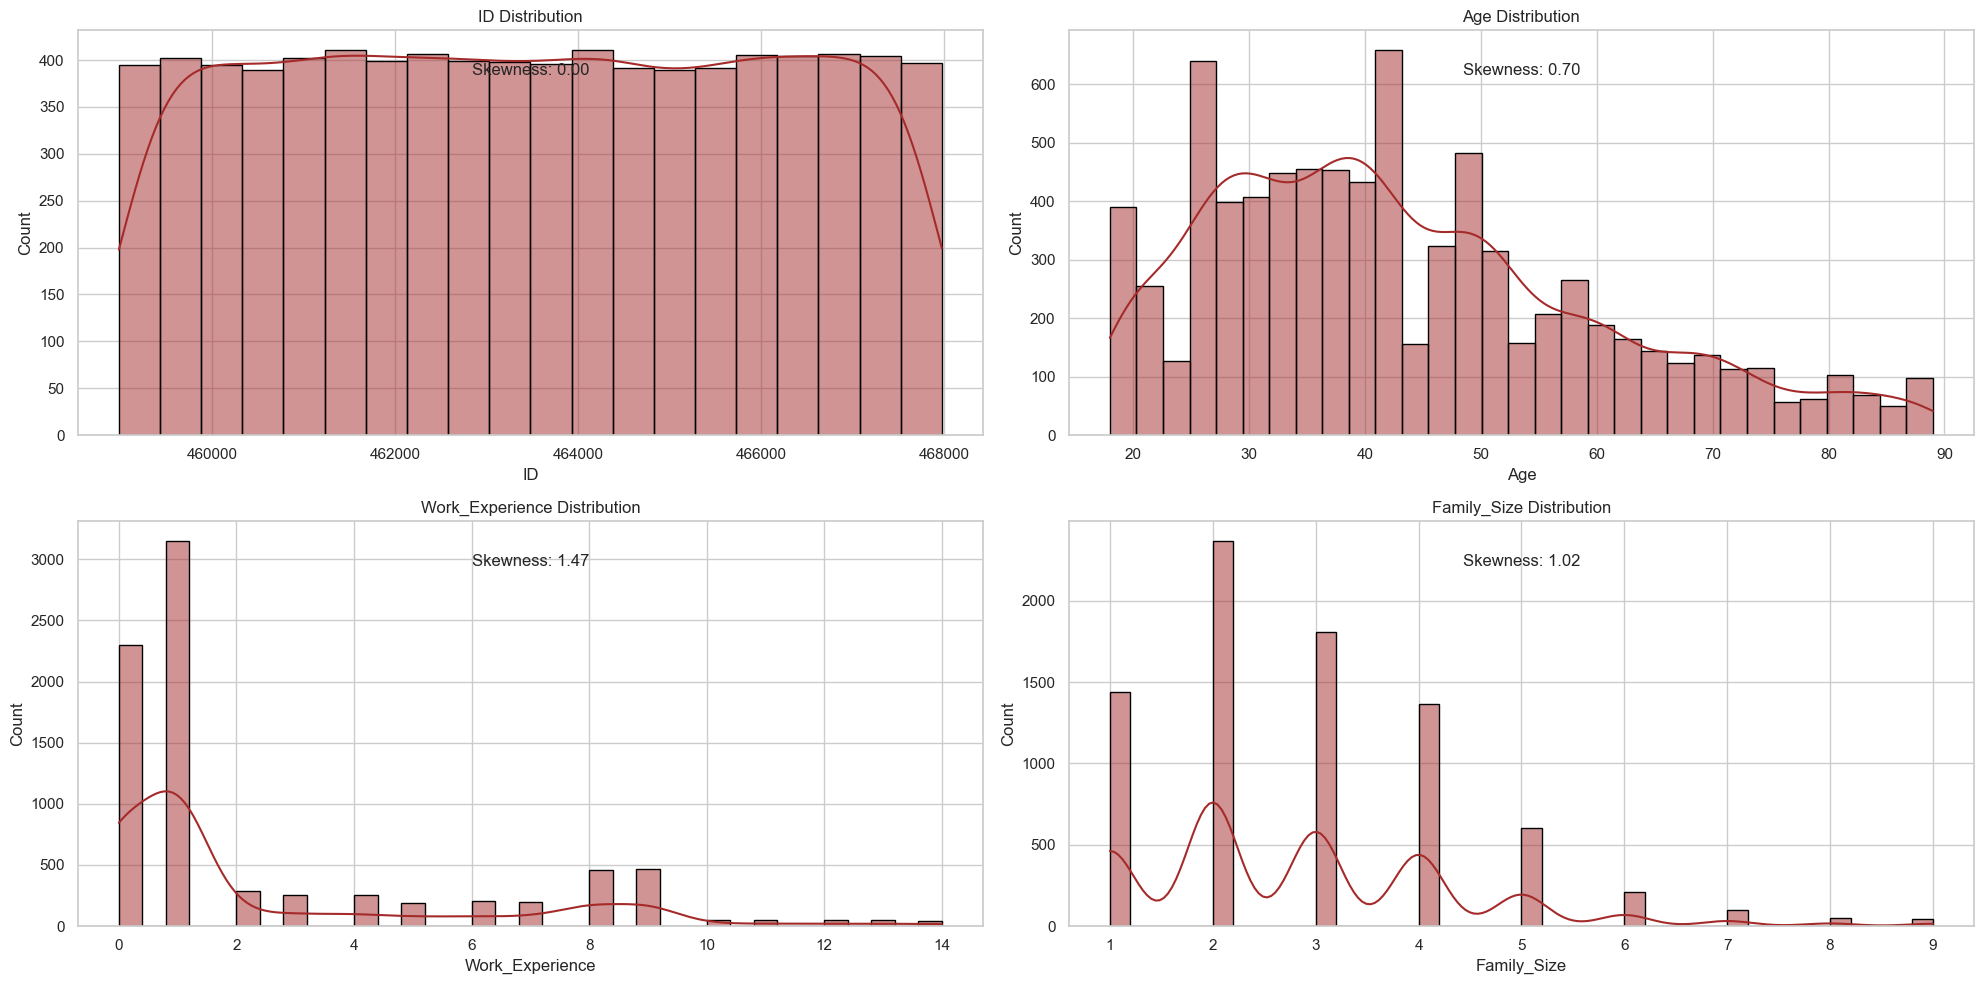

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

for i, col in enumerate(numeric_columns[:2]):  
    sns.histplot(data=train_data, x=col, ax=axes[0, i], kde=True, color="brown", edgecolor='black')
    skewness_value = train_data[col].skew()
    axes[0, i].text(0.5, 0.9, f'Skewness: {skewness_value:.2f}', horizontalalignment='center', verticalalignment='center', transform=axes[0, i].transAxes, fontsize=12)
    axes[0, i].set_title(f'{col} Distribution')

for i, col in enumerate(float_columns[:2]): 
    sns.histplot(data=train_data, x=col, ax=axes[1, i], kde=True, color="brown", edgecolor='black')
    skewness_value = train_data[col].skew()
    axes[1, i].text(0.5, 0.9, f'Skewness: {skewness_value:.2f}', horizontalalignment='center', verticalalignment='center', transform=axes[1, i].transAxes, fontsize=12)
    axes[1, i].set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()

#### * Histogram for distribution of Categorical columns :

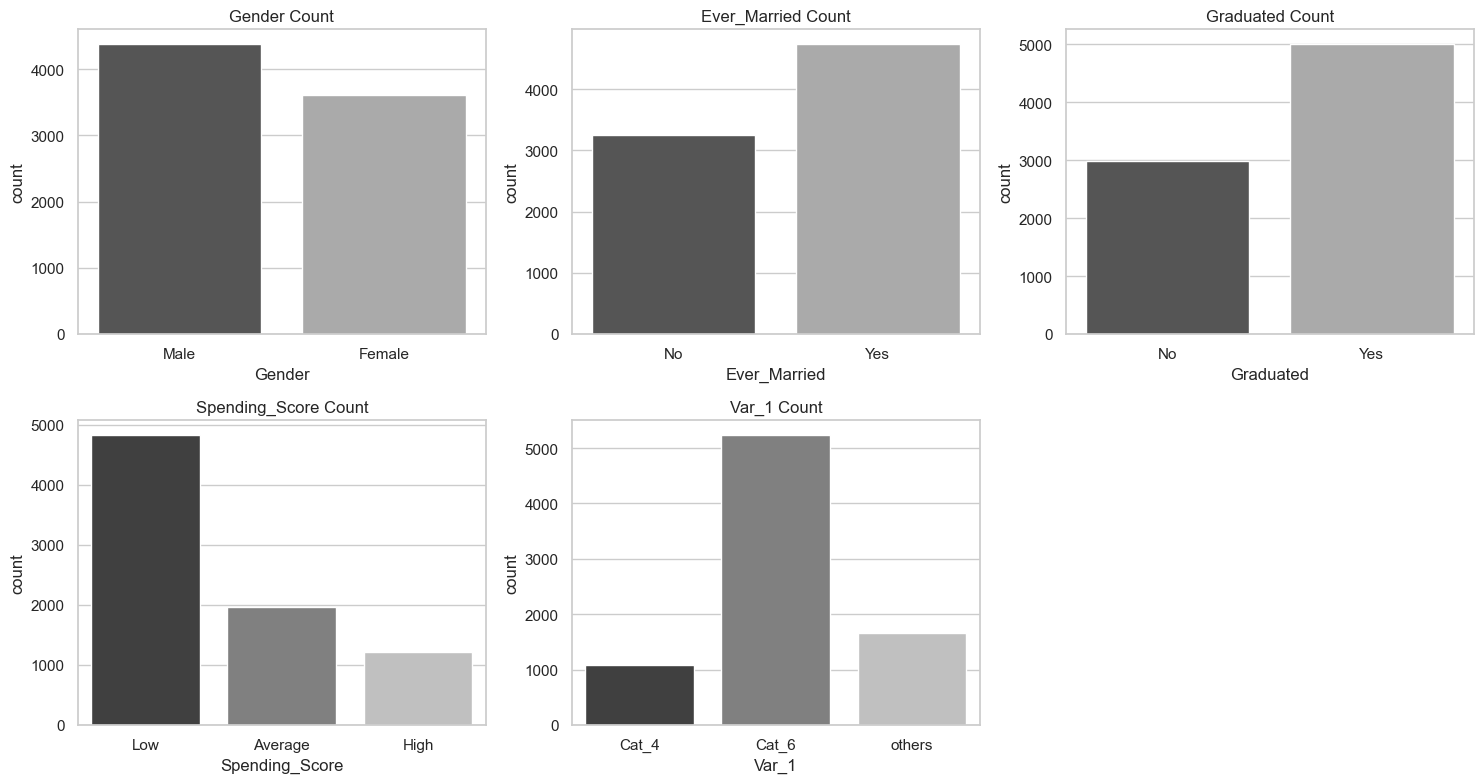

In [23]:
hist_graph_cc = ['Gender', 'Ever_Married', 'Graduated', 'Spending_Score', 'Var_1']
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

axes = axes.flatten()

for i, cat_col in enumerate(hist_graph_cc):
    sns.countplot(data=train_data, x=cat_col, ax=axes[i], palette = 'gray')
    axes[i].set_title(f'{cat_col} Count')
fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

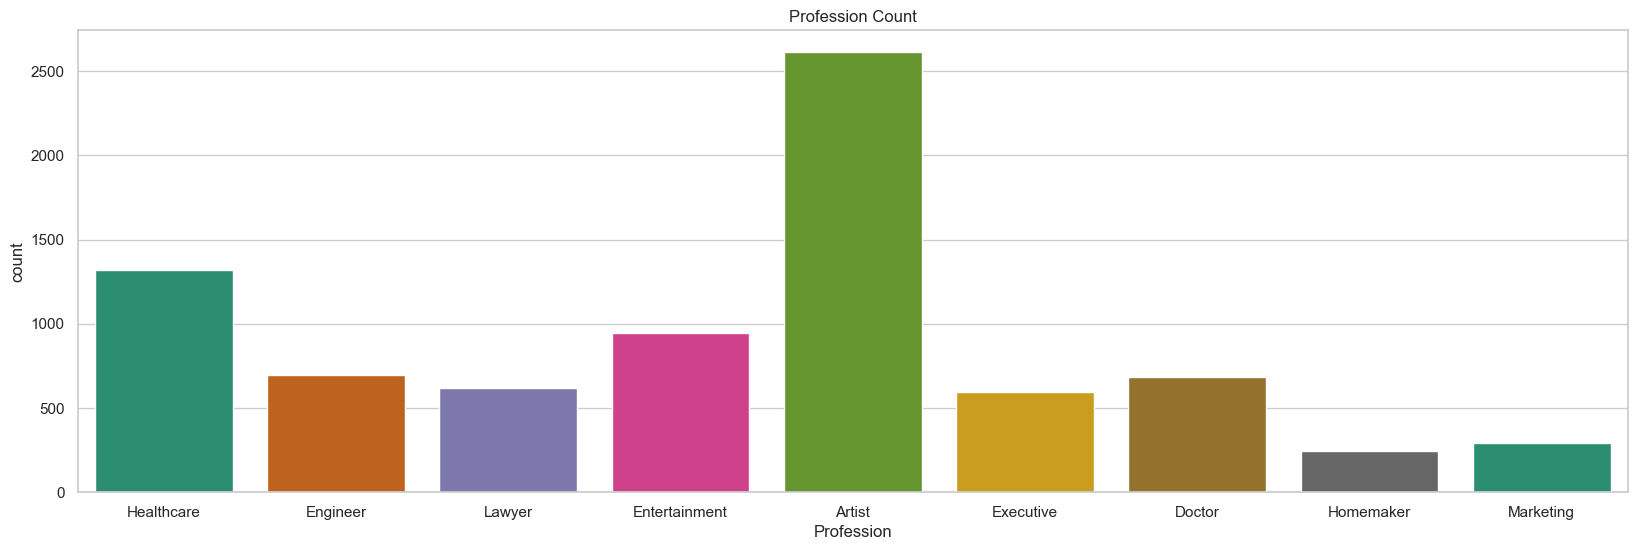

In [24]:
plt.figure(figsize=(20, 6))
sns.countplot(x='Profession', data=train_data, palette = 'Dark2')
plt.title("Profession Count")
plt.show()

### 

## Encoding :

#### * Encoding the categorical columns in dataframe except "Var_1"(target variable column):

In [25]:
numeric = ['ID', 'Age']
float_cols = ['Work_Experience', 'Family_Size']
categorical = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score']
target_variable = ['Var_1']

In [26]:
encoded_df = pd.get_dummies(train_data, columns = categorical)
encoded_df.drop(columns=numeric + float_cols, inplace=True)
pd.set_option('display.max_columns', None)
encoded_df.sample(7)

Var_1  Gender_Female  Gender_Male  Ever_Married_No  Ever_Married_Yes  \
2648   Cat_6          False         True             True             False   
1544   Cat_6           True        False             True             False   
5995  others          False         True            False              True   
2880   Cat_4           True        False             True             False   
6563   Cat_6           True        False             True             False   
4046   Cat_6           True        False            False              True   
6381   Cat_6           True        False             True             False   

      Graduated_No  Graduated_Yes  Profession_Artist  Profession_Doctor  \
2648          True          False              False               True   
1544         False           True               True              False   
5995         False           True              False              False   
2880         False           True              False              False   
6563          True          False              False               True   
4046         False           True              False              False   
6381          True          False              False              False   

      Profession_Engineer  Profession_Entertainment  Profession_Executive  \
2648                False                     False                 False   
1544                False                     False                 False   
5995                False                     False                  True   
2880                False                     False                 False   
6563                False                     False                 False   
4046                 True                     False                 False   
6381                False                     False                 False   

      Profession_Healthcare  Profession_Homemaker  Profession_Lawyer  \
2648                  False                 False              False   
1544                  False                 False              False   
5995                  False                 False              False   
2880                   True                 False              False   
6563                  False                 False              False   
4046                  False                 False              False   
6381                   True                 False              False   

      Profession_Marketing  Spending_Score_Average  Spending_Score_High  \
2648                 False                   False                False   
1544                 False                   False                False   
5995                 False                   False                 True   
2880                 False                   False                False   
6563                 False                   False                False   
4046                 False                   False                 True   
6381                 False                   False                False   

      Spending_Score_Low  
2648                True  
1544                True  
5995               False  
2880                True  
6563                True  
4046               False  
6381                True

In [27]:
print("Original dataframe shape:", train_data.shape)
print("Encoded dataframe shape:", encoded_df.shape)

Original dataframe shape: (7992, 10)
Encoded dataframe shape: (7992, 19)


## Scaling using Standard Scaler :

#### * Normalize the numeric and float columns using Standard Scaler :

In [28]:
scaler = StandardScaler()

train_data[numeric_columns] = scaler.fit_transform(train_data[numeric])

scaled_numeric_float = scaler.fit_transform(train_data[numeric + float_cols])
scaled_numeric_float_df = pd.DataFrame(scaled_numeric_float, columns=numeric + float_cols)

scaled_numeric_float_df.sample(6)

ID       Age  Work_Experience  Family_Size
4872 -0.063922  1.708718        -0.757372    -1.236169
1328  1.582030  1.169852        -0.757372     0.761296
2859 -1.660932  0.690859        -0.451252    -0.570347
6148 -1.492136 -1.404733        -0.451252     1.427118
3740  0.457110 -0.087504        -0.757372     0.761296
886   0.374639  1.828467        -0.451252    -0.570347

In [29]:
scaled_numeric_float_df.shape

(7992, 4)

## Creating the main dataframe :

#### * Concatenating the encoded and scaled data and creating one dataframe for further analysis:

In [30]:
scaled_numeric_float_df.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

main_train_df = pd.concat([scaled_numeric_float_df, encoded_df], axis=1)
main_train_df

ID       Age  Work_Experience  Family_Size   Var_1  Gender_Female  \
0    -0.259695 -1.284985        -0.451252     0.761296   Cat_4          False   
1    -0.323668 -0.327000        -0.451252     0.095474   Cat_4           True   
2     1.091443  1.409348        -0.451252    -1.236169   Cat_6           True   
3    -0.673591  1.409348        -0.757372    -0.570347   Cat_6          False   
4    -0.313648 -0.207252        -0.451252     2.092939   Cat_6           True   
...        ...       ...              ...          ...     ...            ...   
7987  0.206228 -1.284985        -0.757372     2.758761  others          False   
7988  0.463276 -0.506622         0.160989     0.761296   Cat_4          False   
7989  0.741134 -0.626370        -0.451252    -1.236169   Cat_6           True   
7990  1.470656 -0.985615        -0.451252     0.761296   Cat_6           True   
7991 -0.618097 -0.386874        -0.757372     0.095474   Cat_4          False   

      Gender_Male  Ever_Married_No  Ever_Married_Yes  Graduated_No  \
0            True             True             False          True   
1           False            False              True         False   
2           False            False              True         False   
3            True            False              True         False   
4           False            False              True         False   
...           ...              ...               ...           ...   
7987         True             True             False          True   
7988         True             True             False          True   
7989        False             True             False         False   
7990        False             True             False         False   
7991         True            False              True         False   

      Graduated_Yes  Profession_Artist  Profession_Doctor  \
0             False              False              False   
1              True              False              False   
2              True              False              False   
3              True              False              False   
4              True              False              False   
...             ...                ...                ...   
7987          False               True              False   
7988          False              False              False   
7989           True              False              False   
7990           True              False              False   
7991           True              False              False   

      Profession_Engineer  Profession_Entertainment  Profession_Executive  \
0                   False                     False                 False   
1                    True                     False                 False   
2                    True                     False                 False   
3                   False                     False                 False   
4                   False                      True                 False   
...                   ...                       ...                   ...   
7987                False                     False                 False   
7988                False                     False                  True   
7989                False                     False                 False   
7990                False                     False                 False   
7991                False                     False                  True   

      Profession_Healthcare  Profession_Homemaker  Profession_Lawyer  \
0                      True                 False              False   
1                     False                 False              False   
2                     False                 False              False   
3                     False                 False               True   
4                     False                 False              False   
...                     ...                   ...                ...   
7987                  False         

In [31]:
main_df_nullcount = main_train_df.isnull().sum()

if main_df_nullcount.any():
    print("Null values present. Details:")
    print(main_df_nullcount)
    total_nulls = train_data.isnull().sum().sum()
    print("Total Null Values in the data :", total_nulls)
else:
    print("No null values present.")
    print("Shape of the data :" , main_train_df.shape)

No null values present.
Shape of the data : (7992, 23)


#### * Mapping the target column :

In [32]:
name_mapping = { 'Cat_4':0,'Cat_6':1, 'others':2}
main_train_df["Var_1"] = main_train_df['Var_1'].map(name_mapping)
main_train_df

ID       Age  Work_Experience  Family_Size  Var_1  Gender_Female  \
0    -0.259695 -1.284985        -0.451252     0.761296      0          False   
1    -0.323668 -0.327000        -0.451252     0.095474      0           True   
2     1.091443  1.409348        -0.451252    -1.236169      1           True   
3    -0.673591  1.409348        -0.757372    -0.570347      1          False   
4    -0.313648 -0.207252        -0.451252     2.092939      1           True   
...        ...       ...              ...          ...    ...            ...   
7987  0.206228 -1.284985        -0.757372     2.758761      2          False   
7988  0.463276 -0.506622         0.160989     0.761296      0          False   
7989  0.741134 -0.626370        -0.451252    -1.236169      1           True   
7990  1.470656 -0.985615        -0.451252     0.761296      1           True   
7991 -0.618097 -0.386874        -0.757372     0.095474      0          False   

      Gender_Male  Ever_Married_No  Ever_Married_Yes  Graduated_No  \
0            True             True             False          True   
1           False            False              True         False   
2           False            False              True         False   
3            True            False              True         False   
4           False            False              True         False   
...           ...              ...               ...           ...   
7987         True             True             False          True   
7988         True             True             False          True   
7989        False             True             False         False   
7990        False             True             False         False   
7991         True            False              True         False   

      Graduated_Yes  Profession_Artist  Profession_Doctor  \
0             False              False              False   
1              True              False              False   
2              True              False              False   
3              True              False              False   
4              True              False              False   
...             ...                ...                ...   
7987          False               True              False   
7988          False              False              False   
7989           True              False              False   
7990           True              False              False   
7991           True              False              False   

      Profession_Engineer  Profession_Entertainment  Profession_Executive  \
0                   False                     False                 False   
1                    True                     False                 False   
2                    True                     False                 False   
3                   False                     False                 False   
4                   False                      True                 False   
...                   ...                       ...                   ...   
7987                False                     False                 False   
7988                False                     False                  True   
7989                False                     False                 False   
7990                False                     False                 False   
7991                False                     False                  True   

      Profession_Healthcare  Profession_Homemaker  Profession_Lawyer  \
0                      True                 False              False   
1                     False                 False              False   
2                     False                 False              False   
3                     False                 False               True   
4                     False                 False              False   
...                     ...                   ...                ...   
7987                  False                 Fals

# 1.1 Shuffling of the data before training (2 points)

#### * Shuffling the data

In [33]:
main_train_df = main_train_df.sample(frac=1).reset_index(drop=True)
print("Data after shuffling : ", '\n')
display(main_train_df)

Data after shuffling :  



ID       Age  Work_Experience  Family_Size  Var_1  Gender_Female  \
0     1.533472 -0.027630        -0.451252     1.427118      1           True   
1     1.315734  0.511237        -0.757372     0.095474      1          False   
2    -1.539923  1.409348        -0.451252     0.095474      1          False   
3    -0.028467 -0.027630         1.385471     1.427118      2           True   
4    -1.007715 -0.506622        -0.451252    -0.570347      1          False   
...        ...       ...              ...          ...    ...            ...   
7987 -1.637424  2.367333        -0.451252    -1.236169      1           True   
7988  0.241298  0.211867        -0.757372     0.095474      1          False   
7989  1.236731 -0.985615        -0.451252    -1.236169      2           True   
7990 -0.370298 -0.147378        -0.451252     1.427118      0          False   
7991 -1.238942 -0.686244         1.997712    -0.570347      1          False   

      Gender_Male  Ever_Married_No  Ever_Married_Yes  Graduated_No  \
0           False            False              True         False   
1            True            False              True          True   
2            True            False              True          True   
3           False            False              True          True   
4            True            False              True         False   
...           ...              ...               ...           ...   
7987        False            False              True          True   
7988         True            False              True          True   
7989        False            False              True          True   
7990         True            False              True          True   
7991         True            False              True         False   

      Graduated_Yes  Profession_Artist  Profession_Doctor  \
0              True               True              False   
1             False              False               True   
2             False              False              False   
3             False              False              False   
4              True               True              False   
...             ...                ...                ...   
7987          False              False              False   
7988          False              False              False   
7989          False              False              False   
7990          False              False              False   
7991           True               True              False   

      Profession_Engineer  Profession_Entertainment  Profession_Executive  \
0                   False                     False                 False   
1                   False                     False                 False   
2                   False                     False                 False   
3                   False                      True                 False   
4                   False                     False                 False   
...                   ...                       ...                   ...   
7987                False                     False                 False   
7988                False                      True                 False   
7989                 True                     False                 False   
7990                False                     False                  True   
7991                False                     False                 False   

      Profession_Healthcare  Profession_Homemaker  Profession_Lawyer  \
0                     False                 False              False   
1                     False                 False              False   
2                     False                 False               True   
3                     False                 False              False   
4                     False                 False              False   
...                     ...                   ...                ...   
7987                  False                 Fals

# Defining X as features and y as target column :

In [34]:
X = main_train_df.drop(columns=['Var_1'])
y = main_train_df['Var_1']
#display(X, y)

#### * Splitting the data into training and validation sets

In [35]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify = y, random_state=65)

print('Train Test split ratio is : [80, 20]','\n')
print("Training set:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


print("\nTesting set:")
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

Train Test split ratio is : [80, 20] 

Training set:
X_train shape: (6393, 22)
y_train shape: (6393,)

Testing set:
X_val shape: (1599, 22)
y_val shape: (1599,)


# 1.2 Design and train a neural network model (e.g. you can use DNN network or if you want to use any other models it is also acceptable) (10 points)

#### * Defining the model :

In [36]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.14),
    Dense(64, activation='relu'),
    Dropout(0.5), 
    Dense(32, activation='relu'),
    Dropout(0.10),
    Dense(7, activation='softmax')
])

#### * Compile the model

In [37]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [38]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,511 (52.78 KB)

 Trainable params: 13,511 (52.78 KB)

 Non-trainable params: 0 (0.00 B)

# 1.3 Use validation data for model tuning and monitor the f1-score while applying the early stopping logic from keras library (10 points)

#### * Creating the "F1ScoreCallback" :

In [39]:
class F1scoreCallback(tf.keras.callbacks.Callback):
    def __init__(self, X, y, type):
        super(F1scoreCallback, self).__init__()
        self.X = X
        self.y = y
        self.f1_scores = []
        self.type = type

    def on_epoch_end(self, epoch, logs=None):
        y_pred_probs = self.model.predict(self.X)
        y_pred = np.argmax(y_pred_probs, axis=-1)
        if self.y.ndim > 1:
            y_true = np.argmax(self.y, axis=1)
        else:
            y_true = self.y
        f1 = f1_score(y_true, y_pred, average='macro')
        self.f1_scores.append(f1)
        #print(f'Epoch {epoch+1} - {self.type}_f1_score: {f1:.4f}')
        if logs is not None:
            logs[f'{self.type}_f1_score'] = f1


#### * Define early stopping criteria with the F1-score callback

In [88]:

train_f1score_callback = F1scoreCallback(X_train, y_train, type='train')
val_f1score_callback = F1scoreCallback(X_val, y_val, type='val')

early_stopping = EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True)

#### * Train the model

In [89]:

history = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val), 
                    epochs=150, 
                    batch_size=64,
                    callbacks=[early_stopping, train_f1score_callback, val_f1score_callback])

Epoch 1/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/stepy: 0.6562 - loss: 0.89
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6450 - loss: 0.8956 - val_accuracy: 0.6592 - val_loss: 0.8251 - train_f1_score: 0.2915 - val_f1_score: 0.2878
Epoch 2/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 206us/step: 0.7188 - loss: 0.82
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6451 - loss: 0.8524 - val_accuracy: 0.6629 - val_loss: 0.8213 - train_f1_score: 0.3356 - val_f1_score: 0.3288
Epoch 3/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step: 0.6562 - loss: 0.87
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6611 - loss: 0.8318 - val_accuracy: 0.6623 - val_loss: 0.8189 - train_f1_score: 0.3527 - val_f1_score: 0.3430
Epoch 4/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 208us/step: 0.7188 - loss: 0.73
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 216us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

#### Classification report for the Validation dataset.

In [90]:
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy:.4f}')

val_prediction = model.predict(X_val)
y_val_predected = np.argmax(val_prediction, axis=1)

f1 = f1_score(y_val, y_val_predected, average='macro')
print(f'F1-score: {f1}')

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - accuracy: 0.6838 - loss: 0.7898
Test Loss: 0.8067430853843689, Test Accuracy: 0.6742
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 221us/step
F1-score: 0.3869070458239922


In [91]:
train_f1_scores = train_f1score_callback.f1_scores
val_f1_scores = val_f1score_callback.f1_scores
print("Training set f1-score :", train_f1_scores)
print("Validation set f1-score :", val_f1_scores)

Training set f1-score : [0.29150019561672197, 0.33560924601314185, 0.35270784116741466, 0.3329673811659593, 0.3516467537745867, 0.36068428823036003, 0.3570694689115049, 0.3642863980025453, 0.36467973467918346, 0.35517471309373744, 0.3701698557423361, 0.35849984125241807, 0.35858736210335085, 0.3808111982884961, 0.377155686577282, 0.38082776798581747, 0.3783880663476577, 0.3677579872851629, 0.3814640654942545, 0.3811083976409004, 0.40033971350937897, 0.41341195630941147, 0.3761140198213866, 0.4111471008103467, 0.41953228861819597, 0.40082405083725914, 0.4528668437723984, 0.39101444884136033, 0.4268664561546755, 0.4414760812961993, 0.4325808724623273]
Validation set f1-score : [0.2878310370431483, 0.3288339189340302, 0.34299769729956037, 0.3259106686731183, 0.3335941300816247, 0.3517246615346654, 0.34632955696785483, 0.3506209389126495, 0.3599272462456566, 0.3442753113586352, 0.3529133072708965, 0.3400613413487051, 0.3402666267943371, 0.3790316371355795, 0.3684728722482233, 0.36676677629

### 

# 1.4 Use test data to calculate the appropriate classification metrics. (5 points)

# Processing the test_data file for testing the model.

#### * Load the test data

In [92]:
test_data = pd.read_csv('test.csv')
#display(test_data)
test_data.shape

(2627, 10)

#### * Check the null values in the test data :

In [93]:
print(test_data.isnull().sum())
print("Total null vales : ", test_data.isnull().sum().sum())

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64
Total null vales :  526


#### Going to delete the rows with null values : As there are only 526 null values.


## Handelling the null values

In [94]:
columns_with_null = ['Ever_Married', 'Graduated', 'Profession', 'Work_Experience', 'Family_Size', 'Var_1']

test_data = test_data.dropna(subset=columns_with_null)

In [95]:
test_data_null = test_data.isnull().sum().sum()
print("Total Null Values Remaining after handelling the null values in Test data:", test_data_null)

Total Null Values Remaining after handelling the null values in Test data: 0


In [96]:
print("Shape of the data after Removing rows with null values in the 'Var_1' column :", test_data.shape)

Shape of the data after Removing rows with null values in the 'Var_1' column : (2154, 10)


In [97]:
test_data.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64

In [98]:
test_data.loc[~test_data['Var_1'].isin(['Cat_6', 'Cat_4']), 'Var_1'] = 'others'

## Encoding the test data :

In [99]:
test_encoded = pd.get_dummies(test_data, columns = categorical)
test_encoded.drop(columns=numeric + float_cols, inplace=True)
pd.set_option('display.max_columns', None)
test_encoded

Var_1  Gender_Female  Gender_Male  Ever_Married_No  Ever_Married_Yes  \
0      Cat_6           True        False            False              True   
1      Cat_6          False         True            False              True   
3      Cat_6          False         True            False              True   
5      Cat_4          False         True            False              True   
6      Cat_6          False         True            False              True   
...      ...            ...          ...              ...               ...   
2621   Cat_6           True        False             True             False   
2622   Cat_6          False         True             True             False   
2623   Cat_6           True        False             True             False   
2625   Cat_4          False         True            False              True   
2626  others           True        False             True             False   

      Graduated_No  Graduated_Yes  Profession_Artist  Profession_Doctor  \
0            False           True              False              False   
1            False           True              False              False   
3             True          False              False              False   
5            False           True              False               True   
6            False           True              False               True   
...            ...            ...                ...                ...   
2621         False           True              False              False   
2622          True          False              False              False   
2623         False           True              False               True   
2625         False           True              False              False   
2626         False           True              False              False   

      Profession_Engineer  Profession_Entertainment  Profession_Executive  \
0                    True                     False                 False   
1                   False                     False                 False   
3                   False                     False                  True   
5                   False                     False                 False   
6                   False                     False                 False   
...                   ...                       ...                   ...   
2621                False                      True                 False   
2622                False                     False                 False   
2623                False                     False                 False   
2625                False                     False                  True   
2626                False                     False                 False   

      Profession_Healthcare  Profession_Homemaker  Profession_Lawyer  \
0                     False                 False              False   
1                      True                 False              False   
3                     False                 False              False   
5                     False                 False              False   
6                     False                 False              False   
...                     ...                   ...                ...   
2621                  False                 False              False   
2622                   True                 False              False   
2623                  False                 False              False   
2625                  False                 False              False   
2626                   True                 False              False   

      Profession_Marketing  Spending_Score_Average  Spending_Score_High  \
0                    False                   False                False   
1                    False                    True                False   
3                    False                   False                 True   
5                    False                   False                 

In [100]:
print("Original test dataframe shape:", test_data.shape)
print("Test_Encoded dataframe shape:", test_encoded.shape)

Original test dataframe shape: (2154, 10)
Test_Encoded dataframe shape: (2154, 19)


## Scaling using Standard Scaler :

#### * Normalize the numeric and float columns using Standard Scaler :

In [101]:
test_data[numeric_columns] = scaler.fit_transform(test_data[numeric])

test_scaled_numeric_float = scaler.fit_transform(test_data[numeric + float_cols])
test_scaled_numeric_float_df = pd.DataFrame(test_scaled_numeric_float, columns=numeric + float_cols)

test_scaled_numeric_float_df

ID       Age  Work_Experience  Family_Size
0    -1.739862 -0.445248        -0.762986    -1.172702
1    -1.737932 -0.385575         1.629258     0.742385
2    -1.735616  0.927231         2.526349    -0.534340
3    -1.734458  0.211155        -0.762986     1.380748
4    -1.733686  1.046577         0.732167     0.104023
...        ...       ...              ...          ...
2149  1.718831 -0.504921        -0.463955    -0.534340
2150  1.720374 -0.862959         1.928288     0.742385
2151  1.721918 -0.504921        -0.463955    -1.172702
2152  1.723076  0.211155        -0.463955     1.380748
2153  1.725778 -0.027537         1.928288     0.104023

[2154 rows x 4 columns]

## Creating the main testing dataframe

#### * Concatenating the encoded and scaled data and creating one dataframe for further analysis:

In [102]:
test_scaled_numeric_float_df.reset_index(drop=True, inplace=True)
test_encoded.reset_index(drop=True, inplace=True)

test_data_main = pd.concat([test_scaled_numeric_float_df, test_encoded], axis=1)
test_data_main

ID       Age  Work_Experience  Family_Size   Var_1  Gender_Female  \
0    -1.739862 -0.445248        -0.762986    -1.172702   Cat_6           True   
1    -1.737932 -0.385575         1.629258     0.742385   Cat_6          False   
2    -1.735616  0.927231         2.526349    -0.534340   Cat_6          False   
3    -1.734458  0.211155        -0.762986     1.380748   Cat_4          False   
4    -1.733686  1.046577         0.732167     0.104023   Cat_6          False   
...        ...       ...              ...          ...     ...            ...   
2149  1.718831 -0.504921        -0.463955    -0.534340   Cat_6           True   
2150  1.720374 -0.862959         1.928288     0.742385   Cat_6          False   
2151  1.721918 -0.504921        -0.463955    -1.172702   Cat_6           True   
2152  1.723076  0.211155        -0.463955     1.380748   Cat_4          False   
2153  1.725778 -0.027537         1.928288     0.104023  others           True   

      Gender_Male  Ever_Married_No  Ever_Married_Yes  Graduated_No  \
0           False            False              True         False   
1            True            False              True         False   
2            True            False              True          True   
3            True            False              True         False   
4            True            False              True         False   
...           ...              ...               ...           ...   
2149        False             True             False         False   
2150         True             True             False          True   
2151        False             True             False         False   
2152         True            False              True         False   
2153        False             True             False         False   

      Graduated_Yes  Profession_Artist  Profession_Doctor  \
0              True              False              False   
1              True              False              False   
2             False              False              False   
3              True              False               True   
4              True              False               True   
...             ...                ...                ...   
2149           True              False              False   
2150          False              False              False   
2151           True              False               True   
2152           True              False              False   
2153           True              False              False   

      Profession_Engineer  Profession_Entertainment  Profession_Executive  \
0                    True                     False                 False   
1                   False                     False                 False   
2                   False                     False                  True   
3                   False                     False                 False   
4                   False                     False                 False   
...                   ...                       ...                   ...   
2149                False                      True                 False   
2150                False                     False                 False   
2151                False                     False                 False   
2152                False                     False                  True   
2153                False                     False                 False   

      Profession_Healthcare  Profession_Homemaker  Profession_Lawyer  \
0                     False                 False              False   
1                      True                 False              False   
2                     False                 False              False   
3                     False                 False              False   
4                     False                 False              False   
...                     ...                   ...                ...   
2149                  False         

#### * Mapping Target column :

In [103]:
test_data_main["Var_1"] = test_data_main['Var_1'].map(name_mapping)
test_data_main

ID       Age  Work_Experience  Family_Size  Var_1  Gender_Female  \
0    -1.739862 -0.445248        -0.762986    -1.172702      1           True   
1    -1.737932 -0.385575         1.629258     0.742385      1          False   
2    -1.735616  0.927231         2.526349    -0.534340      1          False   
3    -1.734458  0.211155        -0.762986     1.380748      0          False   
4    -1.733686  1.046577         0.732167     0.104023      1          False   
...        ...       ...              ...          ...    ...            ...   
2149  1.718831 -0.504921        -0.463955    -0.534340      1           True   
2150  1.720374 -0.862959         1.928288     0.742385      1          False   
2151  1.721918 -0.504921        -0.463955    -1.172702      1           True   
2152  1.723076  0.211155        -0.463955     1.380748      0          False   
2153  1.725778 -0.027537         1.928288     0.104023      2           True   

      Gender_Male  Ever_Married_No  Ever_Married_Yes  Graduated_No  \
0           False            False              True         False   
1            True            False              True         False   
2            True            False              True          True   
3            True            False              True         False   
4            True            False              True         False   
...           ...              ...               ...           ...   
2149        False             True             False         False   
2150         True             True             False          True   
2151        False             True             False         False   
2152         True            False              True         False   
2153        False             True             False         False   

      Graduated_Yes  Profession_Artist  Profession_Doctor  \
0              True              False              False   
1              True              False              False   
2             False              False              False   
3              True              False               True   
4              True              False               True   
...             ...                ...                ...   
2149           True              False              False   
2150          False              False              False   
2151           True              False               True   
2152           True              False              False   
2153           True              False              False   

      Profession_Engineer  Profession_Entertainment  Profession_Executive  \
0                    True                     False                 False   
1                   False                     False                 False   
2                   False                     False                  True   
3                   False                     False                 False   
4                   False                     False                 False   
...                   ...                       ...                   ...   
2149                False                      True                 False   
2150                False                     False                 False   
2151                False                     False                 False   
2152                False                     False                  True   
2153                False                     False                 False   

      Profession_Healthcare  Profession_Homemaker  Profession_Lawyer  \
0                     False                 False              False   
1                      True                 False              False   
2                     False                 False              False   
3                     False                 False              False   
4                     False                 False              False   
...                     ...                   ...                ...   
2149                  False                 Fals

#### * Defining the X, Y as featues and target respectively :

In [104]:
test_X = test_data_main.drop(columns=['Var_1'])
test_Y = test_data_main['Var_1']

#### * Testing model using test data and calculating the appropriate classification metrics

In [105]:
test_data_prediction = model.predict(test_X)
test_data_prediction_np = np.argmax(test_data_prediction, axis=1)

print(classification_report(test_Y, test_data_prediction_np))


68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step
              precision    recall  f1-score   support

           0       0.59      0.26      0.36       320
           1       0.69      0.97      0.81      1421
           2       1.00      0.02      0.04       413

    accuracy                           0.69      2154
   macro avg       0.76      0.42      0.40      2154
weighted avg       0.74      0.69      0.59      2154



1. Precision, Recall, and F1-score:
    - For Class 0, the precision is 0.59, recall is 0.26, and F1-score is 0.36. This indicates that the model has moderate precision but struggles with recall in detecting instances of Class 0. The F1-score, being the harmonic mean of precision and recall, suggests a fair balance between precision and recall for this class.
    - For Class 1, the precision is 0.69, recall is 0.97, and the F1-score is 0.81. The model performs well in identifying Class 1 cases, with high precision and recall. The F1-score also signifies a good balance between precision and recall in this class.
    - For Class 2, the precision is 1.00, recall is 0.02, and the F1-score is 0.04. The model achieves perfect precision for Class 2 but struggles severely with recall, missing the majority of instances. Consequently, the F1-score is quite low for this class.

2. Overall Accuracy: 
    - The model's overall accuracy is 69%, indicating that it correctly classifies approximately 69% of the examples in the dataset.

3. Macro and Weighted Averages:
    - Macro average: Precision, recall, and F1-score are calculated by averaging the metrics for each class without considering class imbalance. The macro average precision is 0.76, recall is 0.42, and the F1-score is 0.40.
    
4. Weighted average: 
    - Precision, recall, and F1-score are computed by considering the support (number of instances) for each class, providing a more balanced representation of total performance. The weighted average precision is 0.74, recall is 0.69, and the F1-score is 0.59.

- Overall, the model demonstrates strong performance in recognizing instances of Class 1, exhibiting high precision and recall. However, it struggles notably with Classes 0 and 2, particularly in terms of recall. The macro and weighted averages offer additional insights into the overall performance, considering both class-specific metrics and class distribution across the dataset.

1. Precision :
    - Precision is defined as the ratio of true positive predictions to total positive predictions made by the model. It measures the model's ability to properly identify instances belonging to a certain class from among all instances expected to be that class.
    - Precision in multi-class classification reveals the dependability of the model's positive predictions for each class. It answers the question: "How many of the instances predicted as Class X are actually Class X?"
    - High precision suggests that the model's prediction of a specific class is likely to be right. It demonstrates the model's capacity to reduce false positives, which is critical in situations where misclassification might have serious implications.
2. Recall :
    - Recall, also known as sensitivity or true positive rate, is computed as the ratio of true positive predictions to the total number of actual instances in a given class. It evaluates the model's ability to correctly identify all instances of a class.
    - In multi-class classification, recall measures the model's ability to capture all instances of each class, regardless of whether they were correctly categorized. It answers the following question: "How many instances of Class X did the model correctly identify?"
    - High recall implies that the model effectively reduces false negatives, guaranteeing that the majority of occurrences in a class are accurately identified. It is critical in situations when missing instances of a specific class can lead to negative consequences.
3. F1-score:
    - The F1-score is the harmonic mean of precision and recall, yielding a single statistic that balances both aspects of model performance. It is calculated as 2 × (precision * recall) divided by (precision + recall).
    - In multi-class classification, the F1-score provides a full evaluation of the model's performance, taking into account both false positives and false negatives. It strikes a balance between precision and recall, resulting in a single score reflecting the model's overall efficacy across all classes.
    - The F1-score is especially beneficial when there is a class imbalance or when the costs of false positives and false negatives differ. It assists in picking models that achieve the appropriate balance between precision and recall based on the application's specific requirements.

# 1.6 Generate the loss and f1-score curve for training and validation set. (10 points)

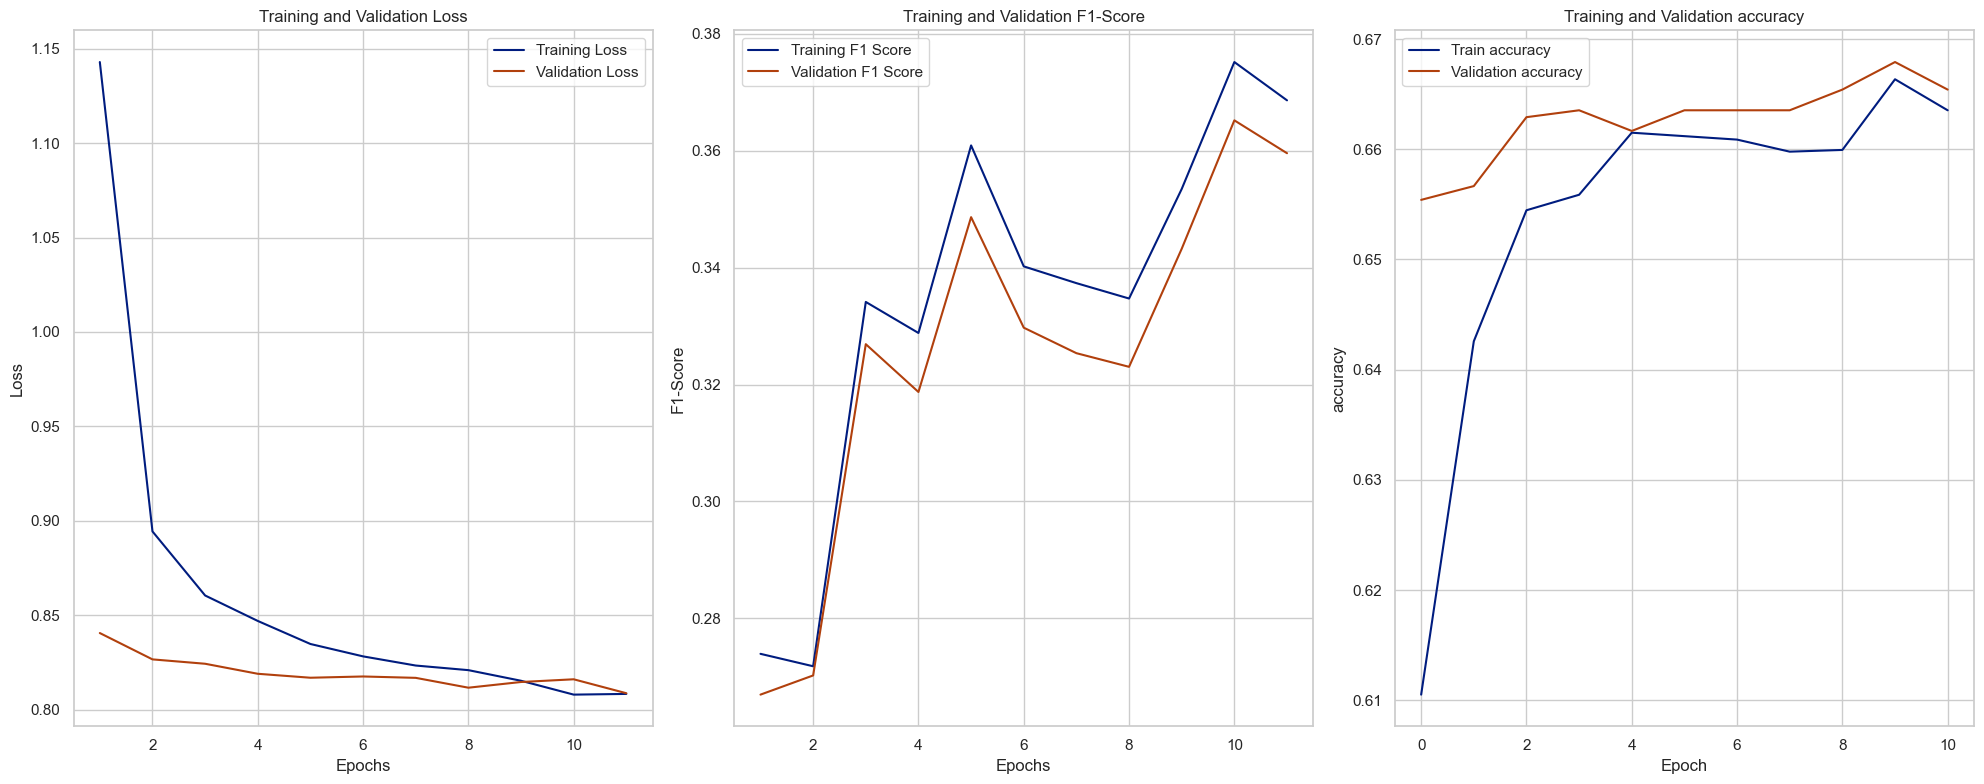

In [58]:
epochs = range(1, len(history.history['loss']) + 1)

plt.figure(figsize=(20, 8))

# Plot training and validation loss
plt.subplot(1, 3, 1)
plt.plot(epochs, history.history['loss'], label='Training Loss')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation F1-Score
plt.subplot(1, 3, 2)
plt.plot(epochs, history.history['train_f1_score'], label='Training F1 Score')
plt.plot(epochs, history.history['val_f1_score'], label='Validation F1 Score')
plt.title('Training and Validation F1-Score')
plt.xlabel('Epochs')
plt.ylabel('F1-Score')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train accuracy', 'Validation accuracy'], loc='upper left')

plt.tight_layout()
plt.show()

1. Training and Validation Loss: 
    - B The first graph depicts training and validation losses. The training loss (blue line) rapidly declines and then flattens, suggesting that the model is learning from the training data. The validation loss (orange line) rapidly lowers, indicating that the model also generalizes well to new data.
2. Training and Validation: 
    - the F1-score for both the training and validation datasets. The training F1 score (blue line) rises with fluctuations, whereas the validation F1 score (orange line) rises as well, but with more noticeable fluctuations. This could imply some degree of overfitting, in which the model performs well on training data but poorly on validation data.
3. Training and Validation Accuracy:
    - The third graph displays the model's accuracy across both the training and validation datasets. The training accuracy (blue line) indicates a consistent improvement, demonstrating that the model is always refining its predictions based on training data. The validation accuracy (orange line) rises but appears to plateau at later epochs, implying that the model may not be improving considerably on validation data in later phases.


# 

# 1.7 Generate a ROC-AUC curve and comment on your model accuracy and find the optimal threshold from the curve. (10 points)

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step


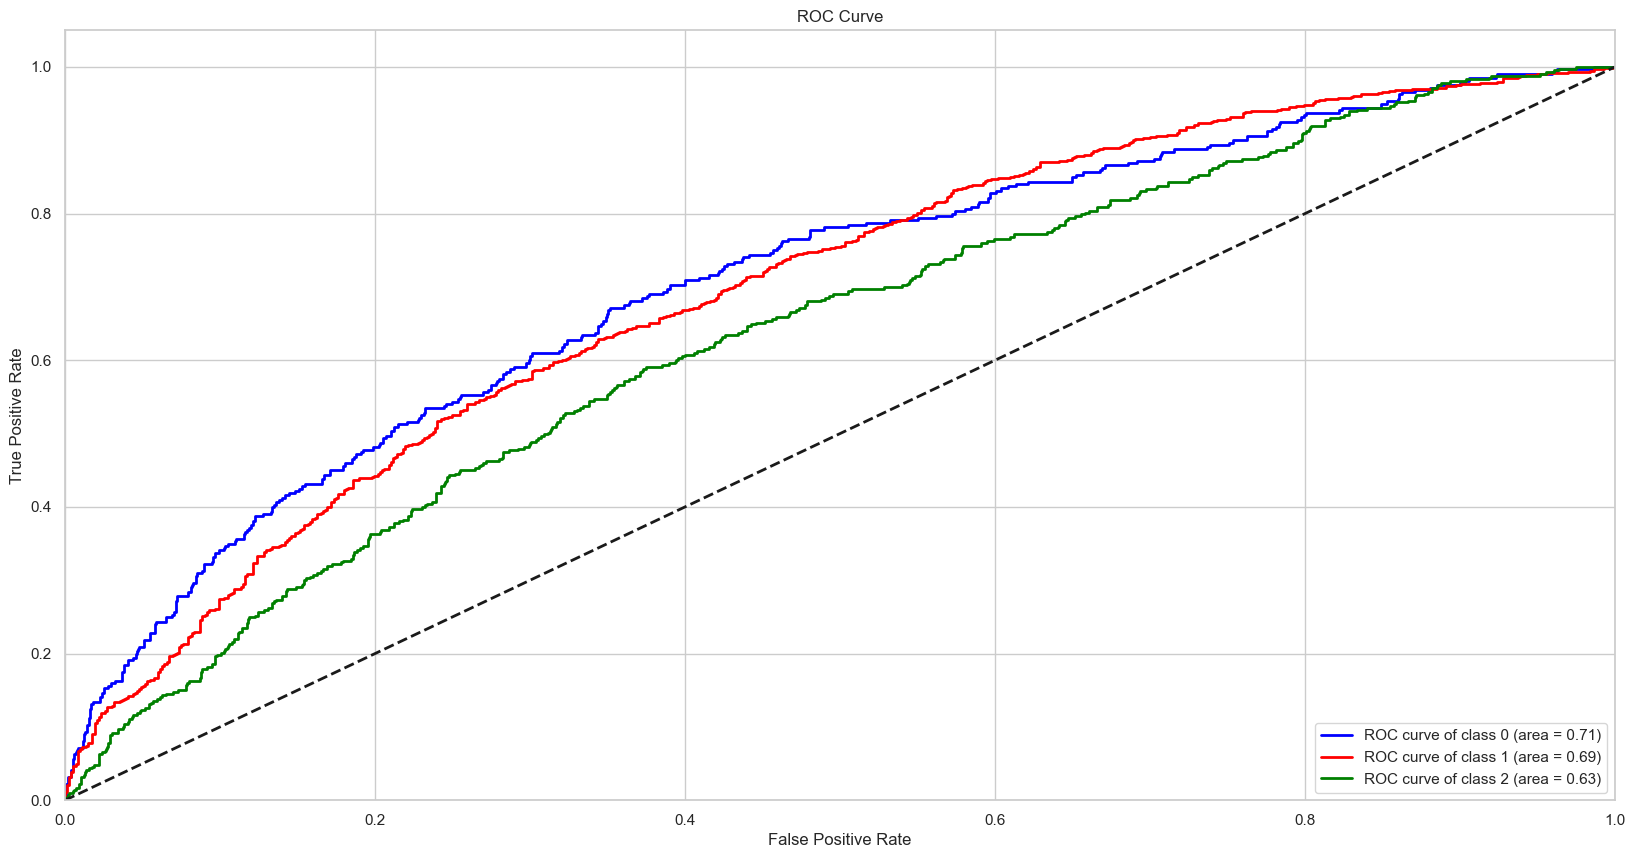

In [60]:
y_prob = model.predict(test_X)

fpr = dict()
tpr = dict()
roc_auc = dict()
num_classes = len(test_Y.unique())
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve((test_Y == i).astype(int), y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(20, 10))
colors = ['blue', 'red', 'green']
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

1. ROC Curve of Class 0: 
    - The blue line depicts the ROC curve for class 0. The area under the curve (AUC) is 0.71, indicating a high level of prediction accuracy in this class.
2. ROC Curve of Class 1: 
    - The green line is the ROC curve for class 1. The AUC is 0.69, which is somewhat lower than class 0, but still suggests a reasonable prediction accuracy.
3. ROC Curve for Class 2: 
    - The red line depicts the ROC curve for class 2. The AUC is 0.63, the lowest of the three classes, but it still indicates a decent level of prediction accuracy.
- In conclusion, all three classes have good prediction accuracy, with class 0 having the highest AUC and class 2 having the lowest. This implies that the model has the highest prediction performance for class 0 and the lowest for class 2. 
- However, all AUC values are relatively high, indicating that the model performs well overall. The ROC curves also show a visual representation of the trade-off between true positive and false positive rates for each class at various threshold levels.

#### * Finding the optimal threshold for each class :

In [63]:
num_samples = test_X.shape[0]
thresholds = np.linspace(0, 1, num_samples)
optimal_thresholds = {}
for i in range(num_classes):
    tpr_minus_fpr = tpr[i] - fpr[i]
    
    optimal_idx = np.argmax(tpr_minus_fpr)
    
    optimal_threshold = thresholds[optimal_idx]
    
    optimal_thresholds[i] = optimal_threshold

print("Optimal Thresholds for each class:", optimal_thresholds)

Optimal Thresholds for each class: {0: 0.12958662331630283, 1: 0.1709242916860195, 2: 0.1611704598235021}


In [64]:

distances = np.sqrt((fpr[1] - 0)**2 + (tpr[1] - 1)**2)

optimal_threshold_index = np.argmin(distances)

optimal_threshold = thresholds[optimal_threshold_index]

print("Optimal Threshold:", optimal_threshold)

Optimal Threshold: 0.1709242916860195


# 

# 1.8 Repeat the steps from 1.1 to 1.7 with sampling in training set. (you can do over sampling to increase the instances of majority class in training set) Compare and comment on the results you get from sampled data and original data distribution. (50 points) (You are expected to do some research on how to apply sampling over a dataset and which libraries usually employed to do so.)

## Sampling the data with respect to target column :

In [65]:
smote = SMOTE()

X_resampled, y_resampled = smote.fit_resample(X, y)

train_oversampled_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Var_1'])], axis=1)
train_oversampled_data

ID       Age  Work_Experience  Family_Size  Gender_Female  \
0      1.533472 -0.027630        -0.451252     1.427118           True   
1      1.315734  0.511237        -0.757372     0.095474          False   
2     -1.539923  1.409348        -0.451252     0.095474          False   
3     -0.028467 -0.027630         1.385471     1.427118           True   
4     -1.007715 -0.506622        -0.451252    -0.570347          False   
...         ...       ...              ...          ...            ...   
15709 -1.115205 -1.407858        -0.459239     1.461864          False   
15710  0.588106 -0.506622        -0.746141     0.095474          False   
15711 -1.041458 -0.125379        -0.451252     0.095474          False   
15712 -1.214815  2.107982        -0.655861    -1.236169           True   
15713 -1.115723 -0.789465        -0.748922     0.742916           True   

       Gender_Male  Ever_Married_No  Ever_Married_Yes  Graduated_No  \
0            False            False              True         False   
1             True            False              True          True   
2             True            False              True          True   
3            False            False              True          True   
4             True            False              True         False   
...            ...              ...               ...           ...   
15709         True             True             False          True   
15710         True             True             False         False   
15711         True            False              True         False   
15712         True            False              True          True   
15713        False             True             False         False   

       Graduated_Yes  Profession_Artist  Profession_Doctor  \
0               True               True              False   
1              False              False               True   
2              False              False              False   
3              False              False              False   
4               True               True              False   
...              ...                ...                ...   
15709          False              False              False   
15710           True              False              False   
15711           True               True              False   
15712          False              False              False   
15713           True              False              False   

       Profession_Engineer  Profession_Entertainment  Profession_Executive  \
0                    False                     False                 False   
1                    False                     False                 False   
2                    False                     False                 False   
3                    False                      True                 False   
4                    False                     False                 False   
...                    ...                       ...                   ...   
15709                False                     False                 False   
15710                False                      True                 False   
15711                False                     False                 False   
15712                False                     False                 False   
15713                 True                     False                 False   

       Profession_Healthcare  Profession_Homemaker  Profession_Lawyer  \
0                      False                 False              False   
1                      False                 False              False   
2                      False                 False               True   
3                      False                 False              False   
4                      False                 False              False   
...                      ...                   ...                ...   
15709                   True                 False              False   
15710

#### Here in this the "train_oversampled_data" is already encoded and scaled above.

In [66]:
groupbt_oversampled = train_oversampled_data.groupby('Var_1').size()
print(groupbt_oversampled)

Var_1
0    5238
1    5238
2    5238
dtype: int64


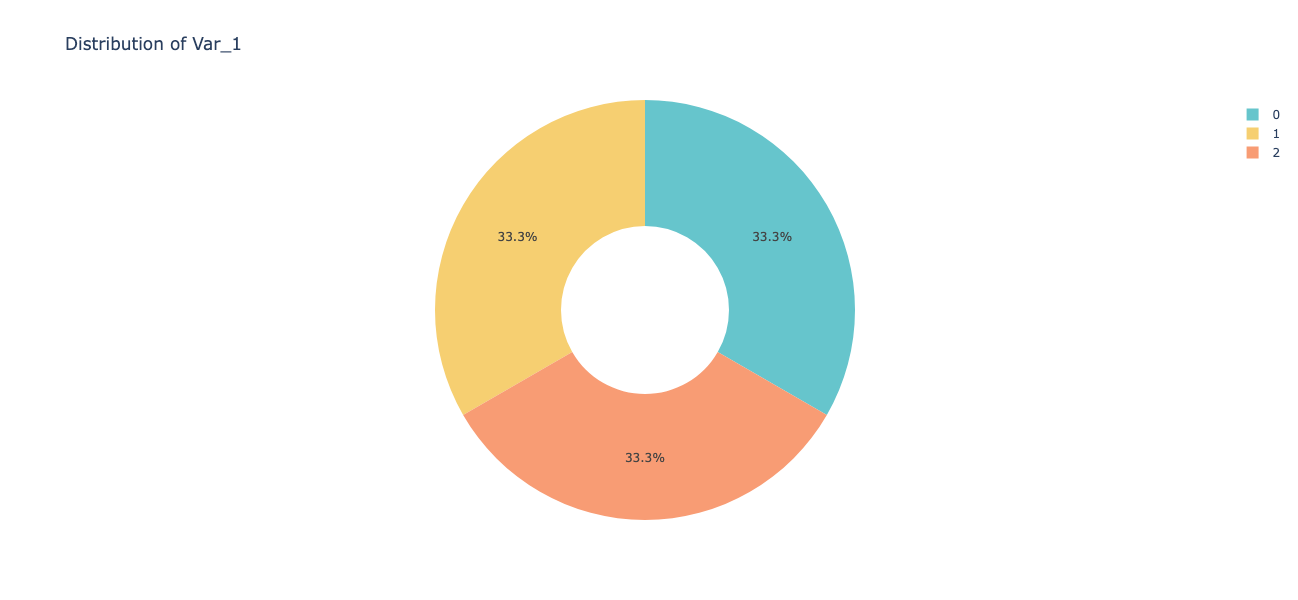

In [67]:
custom_colors = px.colors.qualitative.Pastel

fig_pie = px.pie(groupbt_oversampled, values=groupbt_oversampled.values, names=groupbt_oversampled.index, 
                 title='Distribution of Var_1', 
                 hole=0.4, color_discrete_sequence=custom_colors,
                 width=700, height=600)
fig_pie.show()

#### Here : 
    - 'Cat_4':0, 
    - 'Cat_6':1, 
    - 'others':2

# 1.1 Shuffling of the data before training (2 points)

In [68]:
train_oversampled_data = train_oversampled_data.sample(frac=1).reset_index(drop=True)
print("Data after shuffling : ", '\n')
display(train_oversampled_data)

Data after shuffling :  



ID       Age  Work_Experience  Family_Size  Gender_Female  \
0      0.807419 -0.626370         0.467109    -1.236169          False   
1      1.078194 -0.774191        -0.451252     0.095474           True   
2      0.469442 -0.746118        -0.757372    -0.570347          False   
3      1.512662  0.211867        -0.757372     0.761296          False   
4      0.664409 -0.438299         1.342273     0.381407           True   
...         ...       ...              ...          ...            ...   
15709 -1.018821 -0.746118         1.997712     0.095474           True   
15710 -0.848191  0.213392        -0.757372     0.905302          False   
15711 -1.428934 -0.446748        -0.451252    -0.570347          False   
15712  1.585884  1.469222        -0.451252    -1.236169          False   
15713 -0.072824 -0.642010        -0.371293    -0.570347           True   

       Gender_Male  Ever_Married_No  Ever_Married_Yes  Graduated_No  \
0             True             True             False         False   
1            False             True             False          True   
2             True             True             False          True   
3             True            False              True         False   
4            False            False              True         False   
...            ...              ...               ...           ...   
15709        False             True             False         False   
15710         True            False              True         False   
15711         True             True             False         False   
15712         True            False              True         False   
15713         True            False              True          True   

       Graduated_Yes  Profession_Artist  Profession_Doctor  \
0               True              False              False   
1              False              False               True   
2              False              False               True   
3               True               True              False   
4               True               True              False   
...              ...                ...                ...   
15709           True              False              False   
15710           True               True              False   
15711           True               True              False   
15712           True               True              False   
15713          False              False              False   

       Profession_Engineer  Profession_Entertainment  Profession_Executive  \
0                    False                     False                 False   
1                    False                     False                 False   
2                    False                     False                 False   
3                    False                     False                 False   
4                    False                      True                 False   
...                    ...                       ...                   ...   
15709                False                     False                 False   
15710                False                     False                 False   
15711                False                     False                 False   
15712                False                     False                 False   
15713                False                      True                 False   

       Profession_Healthcare  Profession_Homemaker  Profession_Lawyer  \
0                       True                 False              False   
1                      False                 False              False   
2                      False                 False              False   
3                      False                 False              False   
4                      False                 False              False   
...                      ...                   ...                ...   
15709                   True                 False              False   
15710

#### * Defining the featues and target columns in X_2 and y_2 :

In [69]:
X_2 = train_oversampled_data.drop(columns=['Var_1'])
y_2 = train_oversampled_data['Var_1']

#### * Splitting the data in training and validation :

In [70]:
X_train_oversampled, X_val_oversampled, y_train_oversampled, y_val_oversampled = train_test_split(X_2, y_2, test_size=0.2, random_state=65)

print('Train Test split ratio is : [80, 20]','\n')
print("Training set:")
print("X_train shape:", X_train_oversampled.shape)
print("y_train shape:", y_train_oversampled.shape)


print("\nTesting set:")
print("X_val shape:", X_val_oversampled.shape)
print("y_val shape:", y_val_oversampled.shape)

Train Test split ratio is : [80, 20] 

Training set:
X_train shape: (12571, 22)
y_train shape: (12571,)

Testing set:
X_val shape: (3143, 22)
y_val shape: (3143,)


# 1.2 Design and train a neural network model (e.g. you can use DNN network or if you want to use any other models it is also acceptable) (10 points)

In [71]:
model_2 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.14),
    Dense(64, activation='relu'),
    Dropout(0.5), 
    Dense(32, activation='relu'),
    Dropout(0.10),
    Dense(7, activation='softmax')
])

In [72]:
model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 1.3 Use validation data for model tuning and monitor the f1-score while applying the early stopping logic from keras library (10 points)

In [79]:
train_f1score_callback_2 = F1scoreCallback(X_train_oversampled, y_train_oversampled, type='train')
val_f1score_callback_2 = F1scoreCallback(X_val_oversampled, y_val_oversampled, type='val')

early_stopping_2 = EarlyStopping(monitor='val_loss', mode='max', patience=10, restore_best_weights=True)

In [107]:
history_2 = model_2.fit(X_train_oversampled, y_train_oversampled, 
                    validation_data=(X_val_oversampled, y_val_oversampled), 
                    epochs=150, 
                    batch_size=128, 
                    callbacks=[early_stopping_2, train_f1score_callback_2, val_f1score_callback_2])

Epoch 1/150
393/393 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step accuracy: 0.4942 - loss: 1.
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 214us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4945 - loss: 0.9993 - val_accuracy: 0.5266 - val_loss: 0.9701 - train_f1_score: 0.5313 - val_f1_score: 0.5279
Epoch 2/150
393/393 ━━━━━━━━━━━━━━━━━━━━ 0s 204us/step accuracy: 0.5159 - loss: 0.
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 217us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5153 - loss: 0.9833 - val_accuracy: 0.5317 - val_loss: 0.9522 - train_f1_score: 0.5400 - val_f1_score: 0.5326
Epoch 3/150
393/393 ━━━━━━━━━━━━━━━━━━━━ 0s 203us/step accuracy: 0.5225 - loss: 0.
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 217us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5215 - loss: 0.9701 - val_accuracy: 0.5374 - val_loss: 0.9467 - train_f1_score: 0.5524 - val_f1_score: 0.5398
Epoch 4/150
393/393 ━━━━━━━━━━━━━━━━━━━━ 0s 205us/step accuracy: 0.5342 - loss: 0.
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 220us/step
99/99 ━━━━━━━━━

#### * Classification report for the Validation dataset.

In [108]:
test_loss_2, test_accuracy_2 = model_2.evaluate(X_val_oversampled, y_val_oversampled)
print(f'Test Loss: {test_loss_2}, Test Accuracy: {test_accuracy_2:.4f}')

val_prediction_2 = model_2.predict(X_val_oversampled)
y_val_predected_2 = np.argmax(val_prediction_2, axis=1)

f1_2 = f1_score(y_val_oversampled, y_val_predected_2, average='macro')
print(f'F1-score: {f1_2}')

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step - accuracy: 0.5373 - loss: 0.9690
Test Loss: 0.9700968265533447, Test Accuracy: 0.5266
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 217us/step
F1-score: 0.5278943307522558


In [109]:
train_f1_scores_2 = train_f1score_callback_2.f1_scores
val_f1_scores_2 = val_f1score_callback_2.f1_scores
print("Training set f1-score :", train_f1_scores_2)
print("Validation set f1-score :", val_f1_scores_2)

Training set f1-score : [0.5211777441914612, 0.5298364079842991, 0.5430120975980318, 0.5561693580297321, 0.5660213901980434, 0.5831342780315294, 0.5820223391416044, 0.5932676645143968, 0.5961094809009851, 0.60686555273262, 0.5909243753272763, 0.531308479438066, 0.5399622234929096, 0.5523989538015005, 0.5670486304450705, 0.5743079048479326, 0.587058237252393, 0.5925731564929122, 0.5976320810476449, 0.6076501855200931, 0.6112888778089679]
Validation set f1-score : [0.5207108502108563, 0.5264930182599356, 0.5295157037232806, 0.543794452367753, 0.5536670266636737, 0.5750701077552806, 0.561912396512764, 0.5751440710422754, 0.5740015062196709, 0.5796235027705955, 0.574315910369351, 0.5278943307522558, 0.532552991870616, 0.5397956622282681, 0.5538916520380573, 0.5555759106610213, 0.5706275855263319, 0.5719531405180328, 0.5744486320994703, 0.5912244018940562, 0.5828555396185183]


# 1.4 Use test data to calculate the appropriate classification metrics. (5 points)

In [110]:
test_data_prediction_2 = model_2.predict(test_X)
test_data_prediction_np_2 = np.argmax(test_data_prediction_2, axis=1)

print(classification_report(test_Y, test_data_prediction_np_2))

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 283us/step
              precision    recall  f1-score   support

           0       0.32      0.49      0.38       320
           1       0.81      0.51      0.63      1421
           2       0.26      0.48      0.34       413

    accuracy                           0.50      2154
   macro avg       0.46      0.49      0.45      2154
weighted avg       0.63      0.50      0.54      2154



# 1.5 Explain the significance of each metrics. e.g what recall denotes in terms of multi class classification. (3 points)

1. Precision, Recall, and F1-score:
    - For Class 0, the precision is 0.32, recall is 0.49, and F1-score is 0.38. This indicates that the model has low precision and moderate recall for Class 0, suggesting that it struggles to correctly classify instances of this class.
    - For Class 1, the precision is 0.81, recall is 0.51, and the F1-score is 0.63. The model shows high precision but moderate recall for Class 1, suggesting it performs well in identifying instances of this class but misses some.
    - For Class 2, the precision is 0.26, recall is 0.48, and the F1-score is 0.34. The model has low precision and recall for Class 2, indicating it struggles to detect instances of this class effectively.

2. Overall Accuracy: 
    - The model's overall accuracy is 50%, which means it correctly classifies around half of the examples in the dataset.

3. Macro and Weighted Averages:
    - Macro average: Precision, recall, and F1-score are derived by averaging the metrics for each class, without considering class imbalance. The macro average precision is 0.46, recall is 0.49, and the F1-score is 0.45.
    
4. Weighted average: 
    - Precision, recall, and F1-score are calculated using the support (number of instances) for each class, providing a more realistic evaluation of total performance. The weighted average precision is 0.63, recall is 0.50, and the F1 score is 0.54.

- Overall, the model performs relatively better in recognizing instances of Class 1, with high precision but moderate recall. However, it struggles more with Classes 0 and 2, showing low precision and recall. The macro and weighted averages offer additional insights into the overall performance, considering both class-specific metrics and class distribution in the dataset.

# 1.6 Generate the loss and f1-score curve for training and validation set. (10 points)

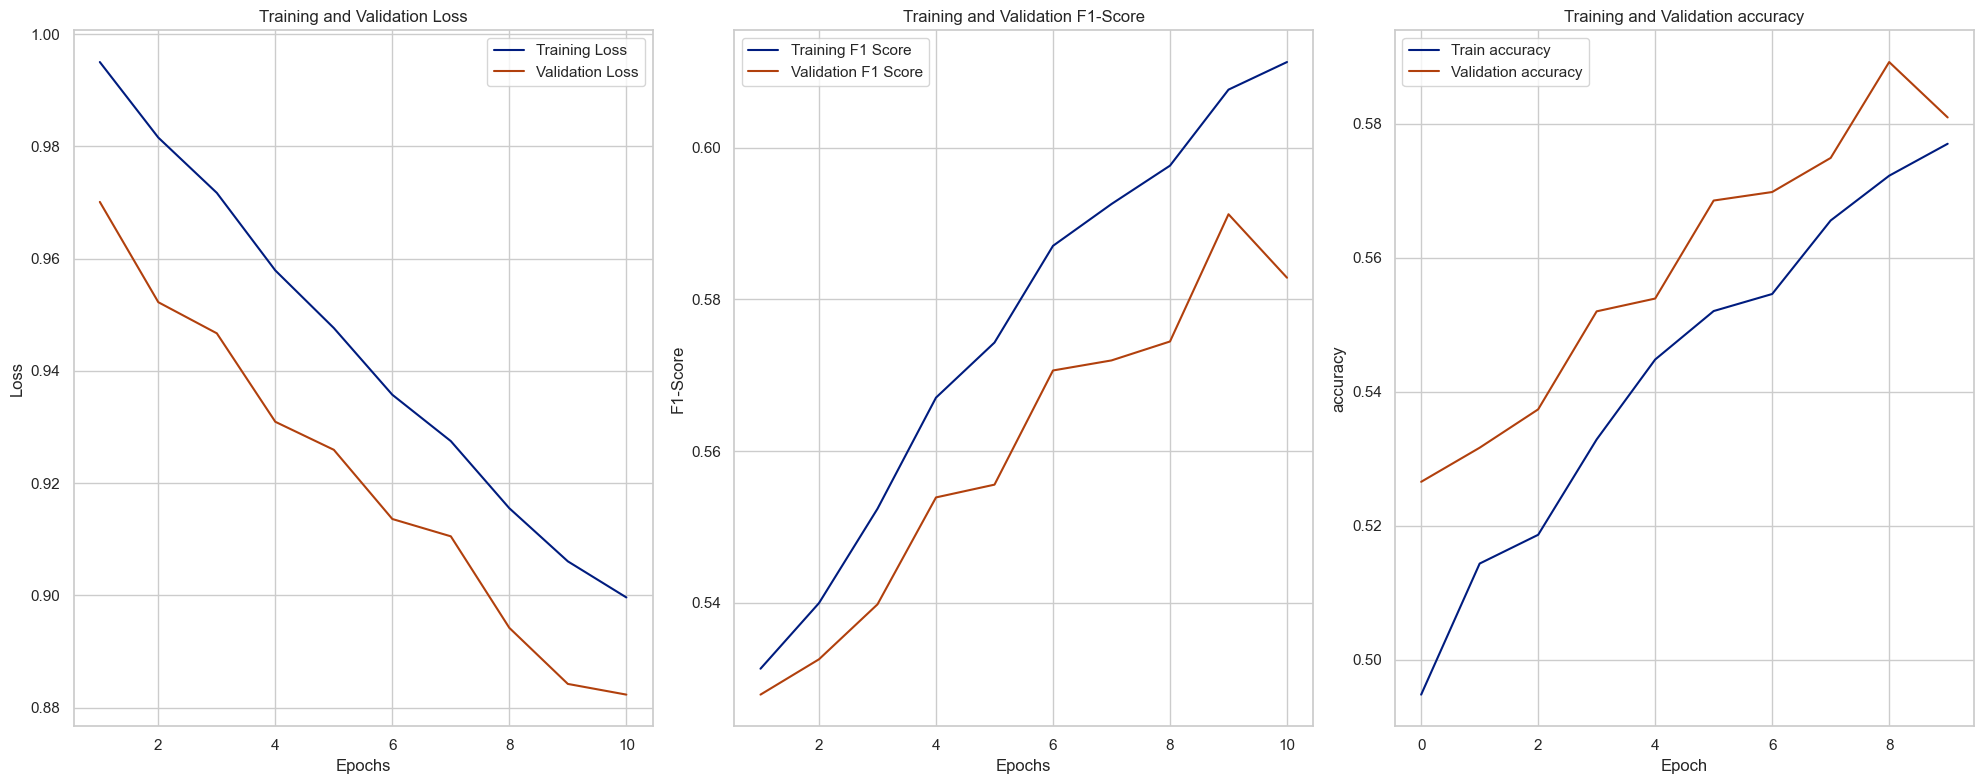

In [111]:
epochs = range(1, len(history_2.history['loss']) + 1)

plt.figure(figsize=(20, 8))

# Plot training and validation loss
plt.subplot(1, 3, 1)
plt.plot(epochs, history_2.history['loss'], label='Training Loss')
plt.plot(epochs, history_2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation F1-Score
plt.subplot(1, 3, 2)
plt.plot(epochs, history_2.history['train_f1_score'], label='Training F1 Score')
plt.plot(epochs, history_2.history['val_f1_score'], label='Validation F1 Score')
plt.title('Training and Validation F1-Score')
plt.xlabel('Epochs')
plt.ylabel('F1-Score')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Training and Validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train accuracy', 'Validation accuracy'], loc='upper left')

plt.tight_layout()
plt.show()

1. Training and Validation Loss: 
    - The graph demonstrates that training and validation losses decrease as the number of epochs grows. This implies that the model learns and improves its predictions over time.
2. Training & Validation F1 Score: 
    -  The F1-Score for both training and validation increases with the number of epochs. This suggests that the F1-Score, which assesses the balance of precision and recall, is improving.
3. Training & Validation Accuracy: 
    - Training and validation accuracy improves as the number of epochs grows. This shows that the model's predictions are becoming increasingly accurate with time.
- Overall, these graphs show that the model's performance improves over time, as indicated by lower loss and higher F1-Score and accuracy. However, it is critical to regularly monitor these measures to avoid overfitting, a condition in which the model performs well on training data but badly on unknown data. If validation measures begin to decline while training metrics continue to improve, this could be an indication of overfitting.

# 1.7 Generate a ROC-AUC curve and comment on your model accuracy and find the optimal threshold from the curve. (10 points)

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step


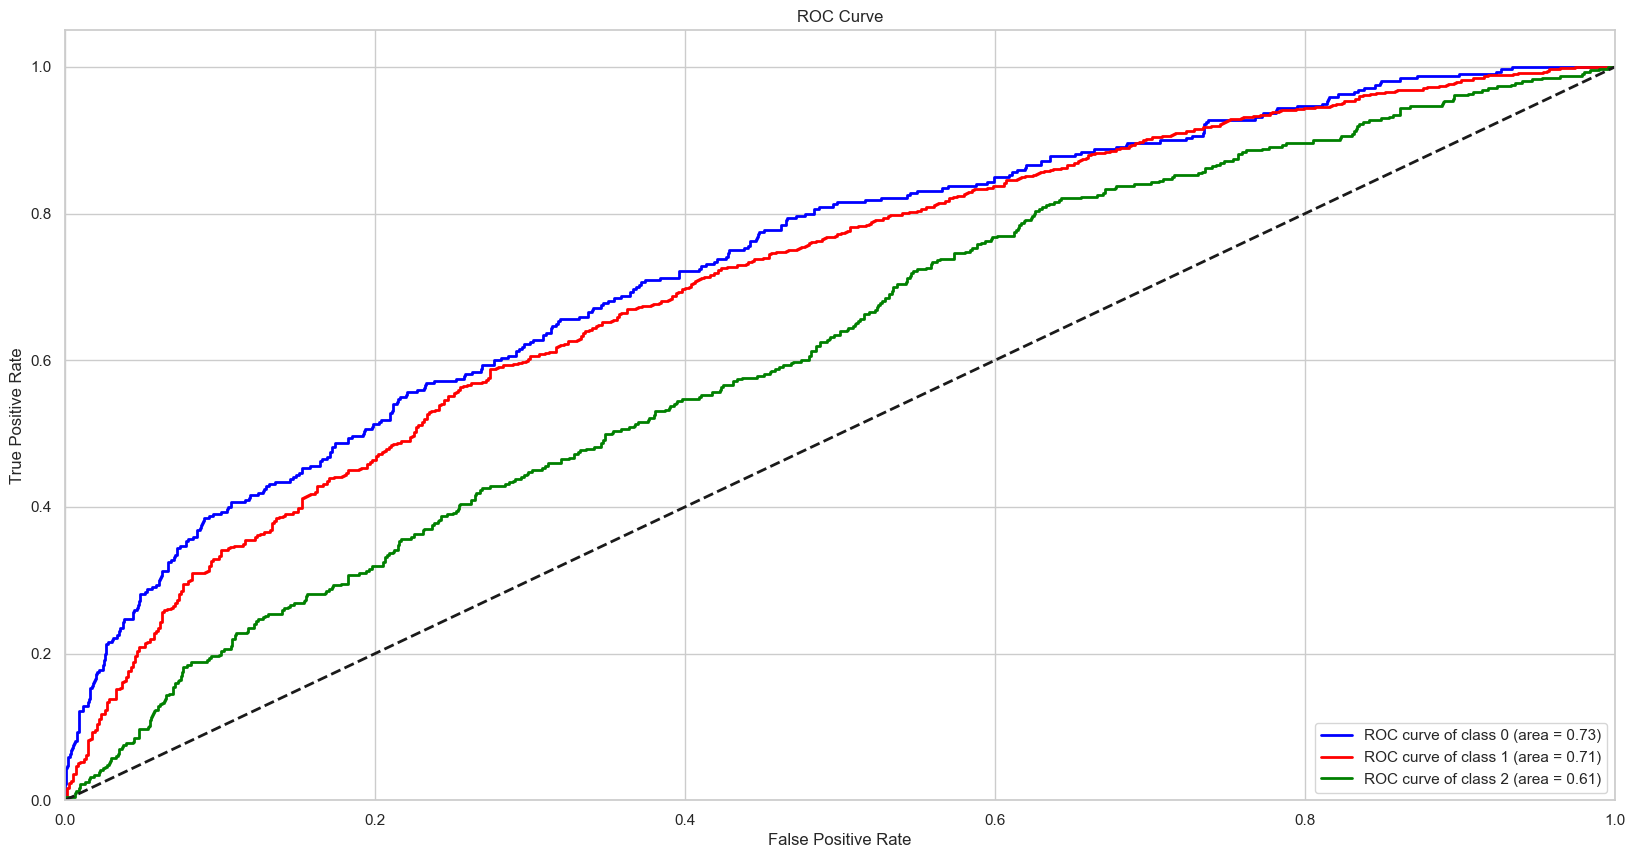

In [85]:
y_prob_2 = model_2.predict(test_X)

fpr_2 = dict()
tpr_2 = dict()
roc_auc_2 = dict()
num_classes_2 = len(test_Y.unique())
for i in range(num_classes_2):
    fpr_2[i], tpr_2[i], _ = roc_curve((test_Y == i).astype(int), y_prob_2[:, i])
    roc_auc_2[i] = auc(fpr_2[i], tpr_2[i])

plt.figure(figsize=(20, 10))
colors = ['blue', 'red', 'green']
for i, color in zip(range(num_classes_2), colors):
    plt.plot(fpr_2[i], tpr_2[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc_2[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

- The graph is titled "ROC Curve".
- The x-axis is called "False Positive Rate" and runs from 0 to 1.0.
- The y-axis is called "True Positive Rate" and runs from 0.0 to 1.0.
- Three ROC curves are shown in different colors, each indicating a different class:
    - Blue: class 0 ROC curve with an AUC of 0.73.
    - Green: ROC curve for class 1 with an AUC of 0.71.
    - Red: class 2 ROC curve with an AUC of 0.61.
- A dashed line extends diagonally across the plot from the origin (bottom left corner) to the top right. This line represents the random classifier.
- The Area Under the Curve (AUC) measures the classifier's performance. A higher AUC indicates improved classifier performance. In this scenario, the classifier is most effective for class 0 (AUC = 0.73), followed by class 1 (AUC = 0.71), and finally class 2 (AUC = 0.61).

In [115]:
num_samples_2 = test_X.shape[0]
thresholds_2 = np.linspace(0, 1, num_samples_2)
optimal_thresholds_2 = {}
for i in range(num_classes_2):
    tpr_minus_fpr = tpr_2[i] - fpr_2[i]
    
    optimal_idx = np.argmax(tpr_minus_fpr)
    
    optimal_threshold = thresholds_2[optimal_idx]
    
    optimal_thresholds_2[i] = optimal_threshold

print("Optimal Thresholds for each class:", optimal_thresholds_2)

Optimal Thresholds for each class: {0: 0.13283790060380865, 1: 0.13887598699489084, 2: 0.229447282861124}


In [116]:
distances_2 = np.sqrt((fpr_2[1] - 0)**2 + (tpr_2[1] - 1)**2)

optimal_threshold_index_2 = np.argmin(distances_2)

optimal_threshold_2 = thresholds[optimal_threshold_index_2]

print("Optimal Threshold:", optimal_threshold_2)

Optimal Threshold: 0.18067812354853693


# Compare and comment on the results you get from sampled data and original data distribution.

#### The results from the original and sampled data distributions reveal significant changes in the performance measures.

1. Precision, recall, and F1-score by class:
    - Precision increased from 0.59 to 0.32 in the sampled data, recall decreased from 0.26 to 0.49, while the F1-score remained stable.
    - For Class 1, precision fell from 0.69 to 0.81, recall from 0.97 to 0.51, and F1-score from 0.81 to 0.63.
    - For Class 2, precision increased from 1.00 to 0.26, recall from 0.02 to 0.48, and F1-score from 0.04 to 0.34.
2. Overall Metrics:
    - The sampled data had an accuracy of 0.50, down from 0.69.
    - The macro average F1-score increased slightly, while the weighted average F1-score dropped from 0.59 to 0.54.
3. Commentary:
    - The sampled data distribution improves precision, recall, and F1-score for Classes 0 and 2, but falls short for Class 1.

- Overall, the model's performance on the sampled data is weaker than on the original data, as seen by a fall in accuracy and weighted average F1 score.
    - The decision between original and sampled data is determined by the task's specific goals and priorities. If balanced performance across all classes is critical, using the original data may be preferable. However, if some classes are more essential than others, or if class imbalance is a major concern, sampling data may be considered.